In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [18]:
# Function to load all parquet pieces from a directory into a single dataframe
def load_parquet_directory(directory):
    df_list = []
    for filename in os.listdir(directory):
        if filename.endswith('.parquet'):
            file_path = os.path.join(directory, filename)
            df_list.append(pd.read_parquet(file_path))
    return pd.concat(df_list, ignore_index=True)

In [19]:
# Load the train and test datasets
train_directory = '../../../Data/Features/All Features/train' 
test_directory = '../../../Data/Features/All Features/test'

In [20]:
df_train = load_parquet_directory(train_directory)
df_test = load_parquet_directory(test_directory)

df_train,df_test

(            Class                             harmonized_filename  \
 0          Pickup       Pickup_train_orig_train_02014_resized.jpg   
 1           Sedan         Sedan_train_orig_test_03371_resized.jpg   
 2           Sedan        Sedan_train_orig_train_01087_resized.jpg   
 3           Sedan         Sedan_train_orig_test_05800_resized.jpg   
 4           Sedan        Sedan_train_orig_train_01720_resized.jpg   
 ...           ...                                             ...   
 5998          SUV           SUV_train_orig_test_06741_resized.jpg   
 5999  Convertible  Convertible_train_orig_train_03194_resized.jpg   
 6000        Sedan         Sedan_train_orig_test_07086_resized.jpg   
 6001       Pickup        Pickup_train_orig_test_04744_resized.jpg   
 6002  Convertible  Convertible_train_orig_train_05719_resized.jpg   
 
                                         image_path_blur  \
 0     ../../../Images/train/Blurred/Pickup_train_ori...   
 1     ../../../Images/train/Blurred/S

In [21]:
# Combine the train and test dataframes
df_combined = pd.concat([df_train, df_test], ignore_index=True)
df_combined

,Class,harmonized_filename,image_path_blur,image_path_no_blur,ViT_Embedding_Element_0,ViT_Embedding_Element_1,ViT_Embedding_Element_2,ViT_Embedding_Element_3,ViT_Embedding_Element_4,ViT_Embedding_Element_5,...,VGG_Embedding_Element_502,VGG_Embedding_Element_503,VGG_Embedding_Element_504,VGG_Embedding_Element_505,VGG_Embedding_Element_506,VGG_Embedding_Element_507,VGG_Embedding_Element_508,VGG_Embedding_Element_509,VGG_Embedding_Element_510,VGG_Embedding_Element_511
0,Pickup,Pickup_train_orig_train_02014_resized.jpg,../../../Images/train/Blurred/Pickup_train_ori...,../../../Images/train/No_Blur/Pickup_train_ori...,-0.440284,0.279516,0.112816,-0.164339,-0.144242,0.374242,...,0.015193,1.136281,0.334297,0.006272,0.000000,0.335663,0.142557,0.162502,0.271791,0.670488
1,Sedan,Sedan_train_orig_test_03371_resized.jpg,../../../Images/train/Blurred/Sedan_train_orig...,../../../Images/train/No_Blur/Sedan_train_orig...,-0.138772,0.006297,0.017159,-0.368060,0.083312,0.275344,...,0.042679,0.866493,0.075713,0.000000,0.000000,0.000618,0.033054,0.341689,0.442764,0.000000
2,Sedan,Sedan_train_orig_train_01087_resized.jpg,../../../Images/train/Blurred/Sedan_train_orig...,../../../Images/train/No_Blur/Sedan_train_orig...,-0.262150,0.140860,0.011239,-0.213304,-0.573705,0.244731,...,0.478943,0.111787,0.074151,0.014714,0.000000,0.091857,0.045422,0.430004,0.651348,0.000000
3,Sedan,Sedan_train_orig_test_05800_resized.jpg,../../../Images/train/Blurred/Sedan_train_orig...,../../../Images/train/No_Blur/Sedan_train_orig...,-0.146410,0.289804,-0.115417,-0.396354,-0.490808,0.480852,...,0.042551,0.281891,0.467090,0.000000,0.003971,0.042616,0.028649,0.288409,0.269555,0.000000
4,Sedan,Sedan_train_orig_train_01720_resized.jpg,../../../Images/train/Blurred/Sedan_train_orig...,../../../Images/train/No_Blur/Sedan_train_orig...,-0.226553,0.007174,-0.116793,-0.478734,-0.076380,0.429462,...,0.027471,1.517789,0.285491,0.021864,0.018889,0.007682,0.080250,0.036420,0.413217,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7487,Sedan,Sedan_test_orig_test_05891_resized.jpg,../../../Images/test/Blurred/Sedan_test_orig_t...,../../../Images/test/No_Blur/Sedan_test_orig_t...,-0.114986,0.416919,0.006434,-0.099978,-0.204515,0.248269,...,0.000000,0.005129,0.138585,0.000000,0.000000,0.023525,0.001275,0.669245,0.289033,0.031903
7488,SUV,SUV_test_orig_train_07587_resized.jpg,../../../Images/test/Blurred/SUV_test_orig_tra...,../../../Images/test/No_Blur/SUV_test_orig_tra...,-0.305994,0.223288,0.097211,-0.386351,-0.377188,0.331570,...,0.199793,0.929628,0.305258,0.000000,0.000000,0.358714,0.080601,0.075457,0.332380,0.000000
7489,Convertible,Convertible_test_orig_test_01119_resized.jpg,../../../Images/test/Blurred/Convertible_test_...,../../../Images/test/No_Blur/Convertible_test_...,-0.173839,0.076692,-0.421268,-0.441278,-0.168950,0.282274,...,0.043615,0.021536,0.026432,0.000000,0.000000,0.000013,0.039712,1.059636,0.645128,0.056297
7490,SUV,SUV_test_orig_train_00986_resized.jpg,../../../Images/test/Blurred/SUV_test_orig_tra...,../../../Images/test/No_Blur/SUV_test_orig_tra...,-0.267668,0.138908,0.038328,-0.266403,-0.158171,0.425292,...,0.010004,0.000000,0.010803,0.015291,0.000000,0.296516,0.030328,0.587830,0.304661,0.000000


In [22]:
numeric_columns = df_combined.select_dtypes(include=[np.number]).columns.tolist()
class_column = 'Class'

In [23]:
df_grouped = df_combined.groupby(class_column)[numeric_columns].mean().reset_index()

In [24]:
average_hue = df_grouped.filter(regex='^hue_').mean(axis=1)
average_saturation = df_grouped.filter(regex='^saturation_').mean(axis=1)
average_value = df_grouped.filter(regex='^value_').mean(axis=1)

In [25]:
# Plotting the averages for each class
def plot_hsv_averages(hue, saturation, value, class_name):
    plt.figure(figsize=(12, 3))
    
    plt.subplot(1, 3, 1)
    plt.bar(range(len(hue)), hue, color='r')
    plt.title(f'Average Hue for {class_name}')
    
    plt.subplot(1, 3, 2)
    plt.bar(range(len(saturation)), saturation, color='g')
    plt.title(f'Average Saturation for {class_name}')
    
    plt.subplot(1, 3, 3)
    plt.bar(range(len(value)), value, color='b')
    plt.title(f'Average Value for {class_name}')
    
    plt.show()

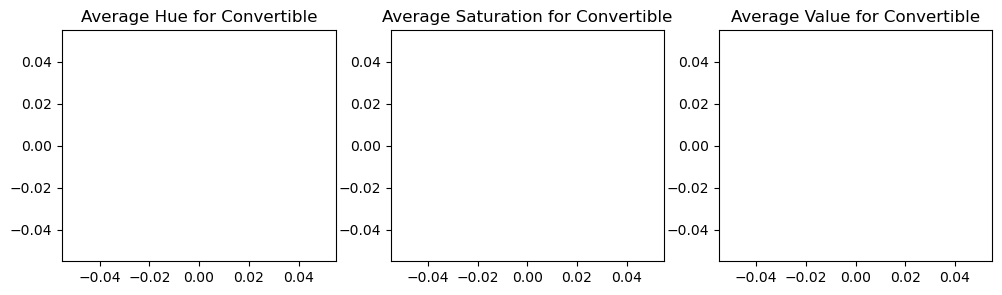

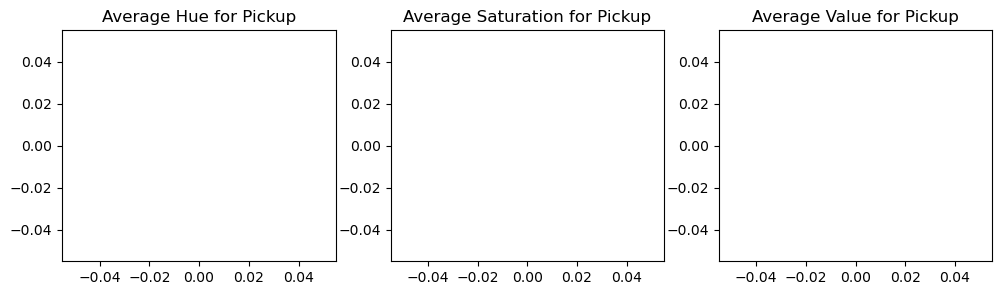

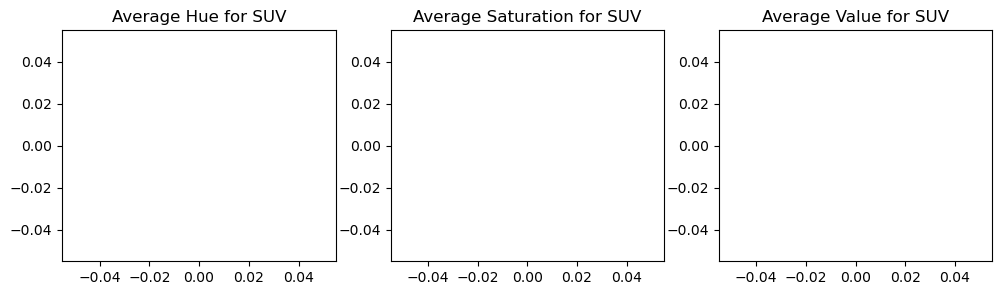

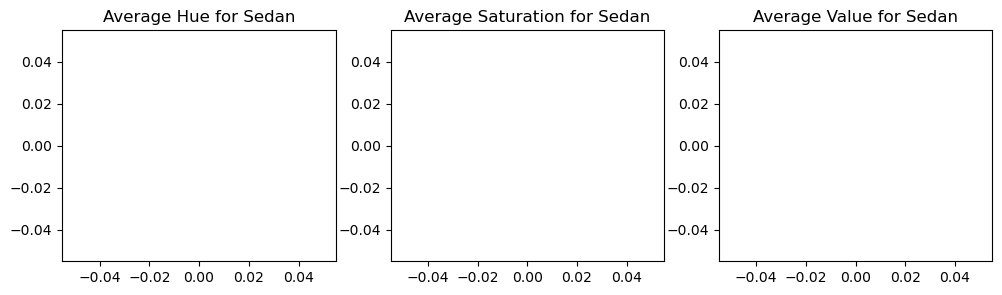

In [26]:
# Iterate over the classes and plot the averages
for idx, row in df_grouped.iterrows():
    class_name = row['Class']
    hue = row.filter(regex='^hue_').values
    saturation = row.filter(regex='^saturation_').values
    value = row.filter(regex='^value_').values
    
    plot_hsv_averages(hue, saturation, value, class_name)